In [164]:
# Create the Tree Sequence using the createTree.ipynb notebook

%run "createTree.ipynb"
ts = ts # Pylance false-positive

import pandas as pd

There are  14 trees and  91 nodes, of which 40 are sample nodes


In [165]:
tree = ts.at_index(0)

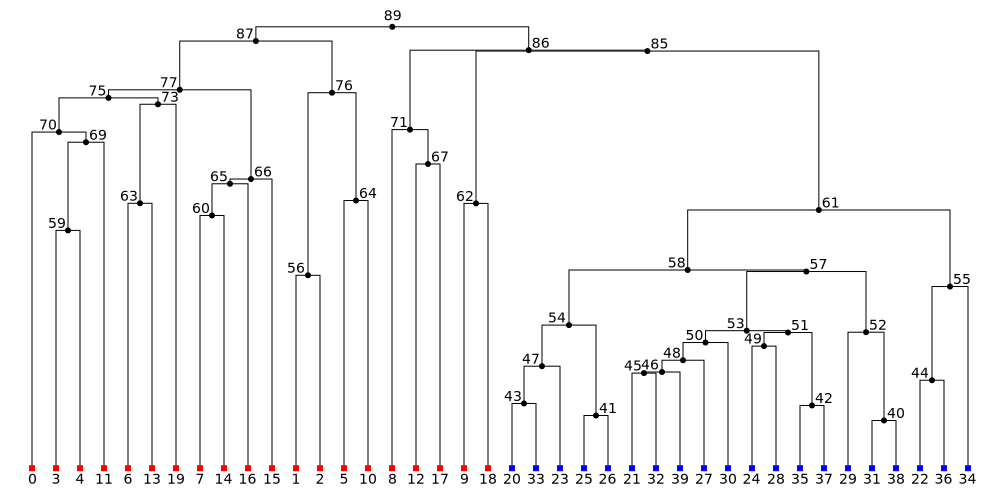

In [166]:
tree.draw(node_colours=node_colours, width=1000, height=500, time_scale='log_time')

In [167]:
# SORT NODES BY TIME

nodes = list(tree.nodes())
times = [tree.time(node) for node in nodes]

df = pd.DataFrame({'nodes': nodes, 'time': times})
df.set_index('nodes', inplace=True)

df.sort_values('time', inplace=True)

print(df)

               time
nodes              
32         0.000000
30         0.000000
27         0.000000
39         0.000000
21         0.000000
...             ...
77      5510.479048
85     13314.339623
86     13581.055937
87     16720.553213
89     23129.365664

[79 rows x 1 columns]


In [168]:
def calcPop(row):
    if (row.time == 0) :
        return ts.tables.nodes.population[row.name]
    else :
        childrenPops = [tree.get_population(child) for child in tree.get_children(row.name)]
        print(row.name, childrenPops)
        if (childrenPops[0] == childrenPops[1]):
            return childrenPops[0]
        else :
            return 2

In [175]:
list(tree.leaves(89))

[8,
 12,
 17,
 34,
 22,
 36,
 25,
 26,
 23,
 20,
 33,
 29,
 31,
 38,
 30,
 27,
 39,
 21,
 32,
 35,
 37,
 24,
 28,
 9,
 18,
 1,
 2,
 5,
 10,
 15,
 16,
 7,
 14,
 0,
 11,
 3,
 4,
 19,
 6,
 13]

In [169]:
def calcColour(row) :
    if (row['pop'] == 0) :
        return 'red'
    elif row['pop'] == 1 :
        return 'blue'
    elif row['pop'] == 2 :
        return 'green'

In [170]:
df['pop'] = df.apply(calcPop, axis=1)
df['col'] = df.apply(calcColour, axis=1)

40 [1, 1]
41 [1, 1]
42 [1, 1]
43 [1, 1]
44 [1, 1]
45 [1, 1]
46 [1, 1]
47 [1, 1]
48 [1, 1]
49 [1, 1]
50 [1, 1]
51 [1, 1]
52 [1, 1]
53 [1, 1]
54 [1, 1]
55 [1, 1]
56 [0, 0]
57 [1, 1]
58 [1, 1]
59 [0, 0]
60 [0, 0]
61 [1, 1]
62 [0, 0]
63 [0, 0]
64 [0, 0]
65 [0, 0]
66 [0, 0]
67 [0, 0]
69 [0, 0]
70 [0, 0]
71 [0, 0]
73 [0, 0]
75 [0, 0]
76 [0, 0]
77 [0, 0]
85 [1, 0]
86 [0, 2]
87 [0, 0]
89 [2, 2]


In [171]:
colours = dict(zip(df.index, df.col))
colours

{32: 'blue',
 30: 'blue',
 27: 'blue',
 39: 'blue',
 21: 'blue',
 6: 'red',
 35: 'blue',
 37: 'blue',
 24: 'blue',
 28: 'blue',
 9: 'red',
 18: 'red',
 38: 'blue',
 1: 'red',
 5: 'red',
 10: 'red',
 15: 'red',
 16: 'red',
 7: 'red',
 14: 'red',
 0: 'red',
 11: 'red',
 3: 'red',
 4: 'red',
 19: 'red',
 2: 'red',
 31: 'blue',
 13: 'red',
 29: 'blue',
 8: 'red',
 12: 'red',
 17: 'red',
 34: 'blue',
 22: 'blue',
 25: 'blue',
 26: 'blue',
 23: 'blue',
 36: 'blue',
 20: 'blue',
 33: 'blue',
 40: 'blue',
 41: 'blue',
 42: 'blue',
 43: 'blue',
 44: 'blue',
 45: 'blue',
 46: 'blue',
 47: 'blue',
 48: 'blue',
 49: 'blue',
 50: 'blue',
 51: 'blue',
 52: 'blue',
 53: 'blue',
 54: 'blue',
 55: 'blue',
 56: 'red',
 57: 'blue',
 58: 'blue',
 59: 'red',
 60: 'red',
 61: 'blue',
 62: 'red',
 63: 'red',
 64: 'red',
 65: 'red',
 66: 'red',
 67: 'red',
 69: 'red',
 70: 'red',
 71: 'red',
 73: 'red',
 75: 'red',
 76: 'red',
 77: 'red',
 85: 'green',
 86: 'green',
 87: 'red',
 89: 'green'}

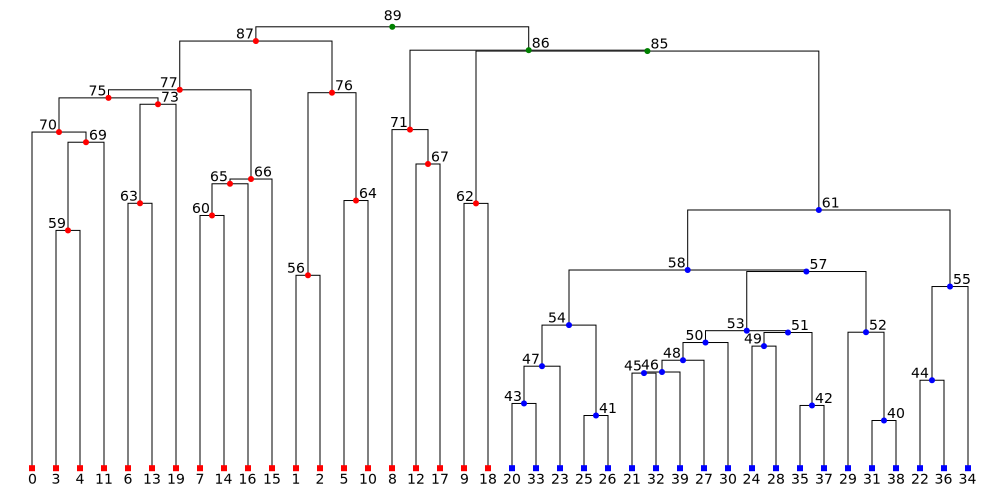

In [172]:
ts.at_index(0).draw(node_colours=colours, width=1000, height=500, time_scale='log_time')